# Introduction
-----

## Acknowledgments
- [🎼 Music generation based on classics 🎼](https://www.kaggle.com/smogomes/music-generation-based-on-classics)
- [Beginner's Guide to Audio Data](https://www.kaggle.com/fizzbuzz/beginner-s-guide-to-audio-data)
- [Music Generation: LSTM 🎹](https://www.kaggle.com/karnikakapoor/music-generation-lstm)

### Dependencies

In [1]:
!pip install music21
!apt-get install -y lilypond

Reading package lists... Done
Building dependency tree       
Reading state information... Done
lilypond is already the newest version (2.20.0-1).
0 upgraded, 0 newly installed, 0 to remove and 17 not upgraded.


In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import wave
import os
import IPython.display as ipd
from music21 import *
from IPython.display import Image, Audio

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter("ignore")

# Reading our Data
------

In [3]:
midis_dir = "../input/classical-music-midi/mozart" # our path to Mozart midi files

In [4]:
np.random.seed(42) # setting a random seed

def all_files(folder_path, shuffle=True):
    """
    Returns all files in a folder
    """
    if shuffle:
        out = [os.path.join(folder_path, file)
                for file in os.listdir(folder_path)]
        np.random.shuffle(out)
        return out
    else:
        return [os.path.join(folder_path, file)
                for file in os.listdir(folder_path)]

In [5]:
all_midis = [] # we will parse all midis and add them into this list
for music in os.listdir(midis_dir):
    if music.endswith(".mid"):
        tr = os.path.join(midis_dir, music)
        midi = converter.parse(tr) # converting our midi files into note sequences
        all_midis.append(midi)

In [6]:
np.random.shuffle(all_midis) # shuffle our dataset

In [7]:
def extract_notes(file): # this function was forked in https://www.kaggle.com/karnikakapoor/music-generation-lstm
    notes = []
    pick = None
    for j in file:
        songs = instrument.partitionByInstrument(j)
        for part in songs.parts:
            pick = part.recurse()
            for element in pick:
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                elif isinstance(element, chord.Chord):
                    notes.append(".".join(str(n) for n in element.normalOrder))

    return notes

notes = extract_notes(all_midis)

Changing working directory to: `/tmp/music21'
Processing `/tmp/music21/tmplmdchlau.ly'
Parsing...
Interpreting music...[8][16][24][32]
Preprocessing graphical objects...
Calculating line breaks... 
Drawing systems... 
Layout output to `tmplmdchlau.ly.eps'...
Converting to PNG...
Deleting `tmplmdchlau.ly.eps'...
Layout output to `tmplmdchlau.ly-1.eps'...
Layout output to `tmplmdchlau.ly-2.eps'...
Layout output to `tmplmdchlau.ly-3.eps'...
Layout output to `tmplmdchlau.ly-4.eps'...
Layout output to `tmplmdchlau.ly-5.eps'...
Writing tmplmdchlau.ly-systems.texi...
Writing tmplmdchlau.ly-systems.tex...
Writing tmplmdchlau.ly-systems.count...
Success: compilation successfully completed


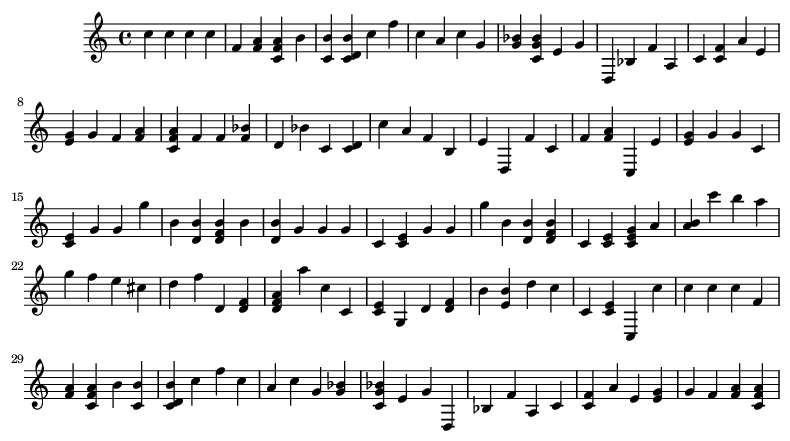

In [8]:
def show(music): # this function was forked in https://www.kaggle.com/karnikakapoor/music-generation-lstm
    display(Image(str(music.write("lily.png"))))
    
def chords_n_notes(Snippet): # this function was forked in https://www.kaggle.com/karnikakapoor/music-generation-lstm
    Melody = []
    offset = 0 #Incremental
    for i in Snippet:
        #If it is chord
        if ("." in i or i.isdigit()):
            chord_notes = i.split(".") #Seperating the notes in chord
            notes = [] 
            for j in chord_notes:
                inst_note=int(j)
                note_snip = note.Note(inst_note)            
                notes.append(note_snip)
                chord_snip = chord.Chord(notes)
                chord_snip.offset = offset
                Melody.append(chord_snip)
        # pattern is a note
        else: 
            note_snip = note.Note(i)
            note_snip.offset = offset
            Melody.append(note_snip)
        # increase offset each iteration so that notes do not stack
        offset += 1
    Melody_midi = stream.Stream(Melody)   
    return Melody_midi

Melody_Snippet = chords_n_notes(notes[:100])
show(Melody_Snippet)

In [9]:
#Helping function        
def extract_notes(file):
    notes = []
    pick = None
    for j in file:
        songs = instrument.partitionByInstrument(j)
        for part in songs.parts:
            pick = part.recurse()
            for element in pick:
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))
                elif isinstance(element, chord.Chord):
                    notes.append(".".join(str(n) for n in element.normalOrder))

    return notes
#Getting the list of notes as Corpus
Corpus= extract_notes(all_midis)
print("Total notes in all dataset:", len(Corpus))

Total notes in all dataset: 55802
